In [3]:
from fastai.text.all import *

In [2]:
pip install fastai


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


In [5]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [8]:
vax_tweets = pd.read_csv("C:/Users/Vandana Krishna/Desktop/CSV/all_tweets.csv")
vax_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [9]:
tweets = pd.read_csv('C:/Users/Vandana Krishna/Desktop/CSV/tweet_dataset.csv')
tweets.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


In [10]:

def de_emojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')


def tweet_proc(df, text_col='text'):
    df['orig_text'] = df[text_col]
    # Remove twitter handles
    df[text_col] = df[text_col].apply(lambda x:re.sub('@[^\s]+','',x))
    # Remove URLs
    df[text_col] = df[text_col].apply(lambda x:re.sub(r"http\S+", "", x))
    # Remove emojis
    df[text_col] = df[text_col].apply(de_emojify)
    # Remove hashtags
    df[text_col] = df[text_col].apply(lambda x:re.sub(r'\B#\S+','',x))
    return df[df[text_col]!='']

# Clean the text data and combine the dfs
tweets = tweets[['old_text', 'new_sentiment']].rename(columns={'old_text':'text', 'new_sentiment':'sentiment'})
vax_tweets['sentiment'] = np.nan
tweets = tweet_proc(tweets)
vax_tweets = tweet_proc(vax_tweets)
df_lm = tweets[['text', 'sentiment']].append(vax_tweets[['text', 'sentiment']])
df_clas = df_lm.dropna(subset=['sentiment'])
print(len(df_lm), len(df_clas))

69371 31323


In [11]:
df_clas.head()

,text,sentiment
1,Layin n bed with a headache ughhhh...waitin on your call...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,"We want to trade with someone who has Houston tickets, but no one will.",neutral
5,Re-pinging why didn't you go to prom? BC my bf didn't like my friends,negative


In [12]:
dls_lm = TextDataLoaders.from_df(df_lm, text_col='text', is_lm=True, valid_pct=0.1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [13]:
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos xxmaj got my second dose of xxmaj modernas xxmaj covid vaccine this afternoon . xxmaj glad to get it done . i had a pretty strong reaction t xxbos i got my xxup covid-19 vaccine today ! xxbos xxmaj exactly this . \n\n xxmaj talk about xxunk defeat from the xxunk of victory . xxbos i have fantastic friends xxbos xxmaj waiting for the last movie to finish then am test,xxmaj got my second dose of xxmaj modernas xxmaj covid vaccine this afternoon . xxmaj glad to get it done . i had a pretty strong reaction t xxbos i got my xxup covid-19 vaccine today ! xxbos xxmaj exactly this . \n\n xxmaj talk about xxunk defeat from the xxunk of victory . xxbos i have fantastic friends xxbos xxmaj waiting for the last movie to finish then am test screening
1,"xxmaj the events captured , no longer xxunk once xxunk in the labs and locked up in th xxbos and xxmaj em , my baby , starts kindergarten . xxmaj what a crazy summer it 's going to be . xxbos 1 , xxrep 3 0 xxmaj russian vaccines from the xxmaj palestinian xxmaj authority arrived in today in \n\n xxmaj the transfer xxbos xxmaj thanks . xxmaj it 's xxup so","the events captured , no longer xxunk once xxunk in the labs and locked up in th xxbos and xxmaj em , my baby , starts kindergarten . xxmaj what a crazy summer it 's going to be . xxbos 1 , xxrep 3 0 xxmaj russian vaccines from the xxmaj palestinian xxmaj authority arrived in today in \n\n xxmaj the transfer xxbos xxmaj thanks . xxmaj it 's xxup so annoying"


In [14]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.004365158267319202)

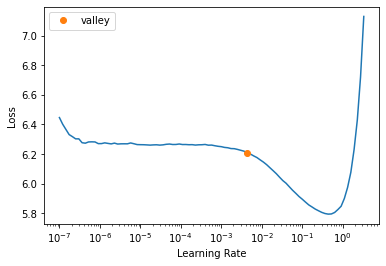

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(1, 3e-2)

C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.397616,4.274265,0.251354,71.827347,45:33


C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\amp\autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
C:\Users\Vandana Krishna\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:118: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.0002754228771664202)

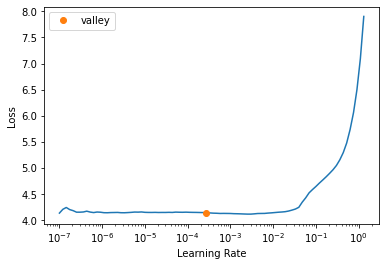

In [17]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.966384,4.116671,0.276068,61.354630,01:19
1,3.815559,4.038570,0.286722,56.745136,01:16
2,3.642752,4.074634,0.281379,58.828949,01:16
3,3.477004,4.060533,0.289100,58.005196,01:17


In [ ]:
# Text generation using the language model
msg = "coronavirus"
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(msg, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

coronavirus vaccine tracker Covid-19 : Share of Injection by region and Moderna in Italy , up - to - date Oh no ! i
coronavirus vaccine czar says Bharat Biotech will supply 20 million doses of vaccine to the US in the next few weeks Today i received my first


In [ ]:
#msg = "poochi loves pratheep so much"
key =8

In [ ]:
def encrypt(msg,key):
  chars = list(msg)
  text=''
  for c in chars:
    text +=chr(ord(c)+key)
  return text

In [ ]:
def decrypt(msg,key):
  chars = list(msg)
  text=''
  for c in chars:
    text +=chr(ord(c)-key)
  return text

In [ ]:
print("Original message: "+msg)
print("Encrypted message: "+encrypt(msg,key))
e_msg =encrypt(msg,key) 
print("Decrypted message: "+ decrypt(e_msg,key) )

Original message: coronavirus
Encrypted message: kwzwvi~qz}{
Decrypted message: coronavirus


In [ ]:
import hashlib
import random
import string
import json
import binascii
import numpy as np
import pandas as pd
import pylab as pl
import logging
%matplotlib inline

In [ ]:
def sha256(message):
    return hashlib.sha256(message.encode('ascii')).hexdigest()

In [ ]:
def dumb_hash(message):
    """
    Returns an hexadecimal hash
    """
    return sha256(message)


def mine(message, difficulty=1):
    """
    Given an input string, will return a nonce such that
    hash(string + nonce) starts with `difficulty` ones
    
    Returns: (nonce, niters)
        nonce: The found nonce
        niters: The number of iterations required to find the nonce
    """
    assert difficulty >= 1, "Difficulty of 0 is not possible"
    i = 0
    prefix = '1' * difficulty
    while True:
        nonce = str(i)
        digest = dumb_hash(message + nonce)
        if digest.startswith(prefix):
            return nonce, i
        i += 1

In [ ]:
nonce, niters = mine('42', difficulty=1)
print('Took %d iterations' % niters)

nonce, niters = mine('42', difficulty=3)
print('Took %d iterations' % niters)

Took 23 iterations
Took 2272 iterations


In [ ]:
def random_string(length=10):
    return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(length))

strings = [random_string() for i in range(50)]

In [ ]:
levels = range(1, 5)
# An array of results with a row for each difficulty and a column for each test string
results = pd.DataFrame(index=strings, columns=levels, dtype=np.int)
results.fillna(value=0)

#results = np.zeros((N_LEVELS, len(strings)), dtype=np.int)
for level in levels:
    for s in strings:
        _, niters = mine(s, difficulty=level)
        results[level][s] = niters

<ipython-input-31-6fb44f05c27b>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  results = pd.DataFrame(index=strings, columns=levels, dtype=np.int)


In [ ]:
results.iloc[:5]

,1,2,3,4
6HK81MWLY0,4.0,246.0,8405.0,406368.0
S1G7RHMULM,23.0,182.0,4388.0,207062.0
E7RDBKILXH,0.0,48.0,329.0,329.0
BQG4BHKUVG,44.0,175.0,2803.0,69473.0
XDQ1ZYOAJT,11.0,675.0,1274.0,16213.0


Text(0, 0.5, 'Iterations')

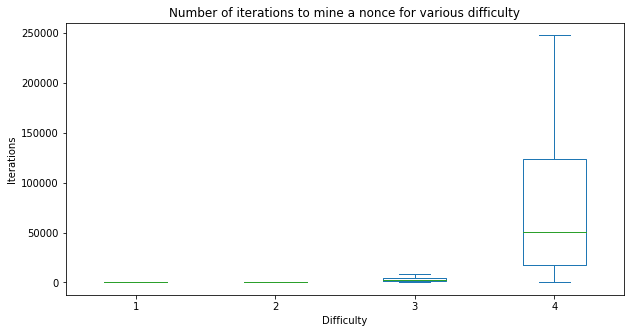

In [ ]:
pl.figure(figsize=(10, 5))
ax = pl.subplot(111)
ax.set_title('Number of iterations to mine a nonce for various difficulty')
results.plot.box(showfliers=False, ax=ax)
ax.set_xlabel('Difficulty')
ax.set_ylabel('Iterations')

In [ ]:
class TransactionInput(object):
    """
    An input for a transaction. This points to an output of another transaction
    """
    def _init_(self, transaction, output_index):
        self.transaction = transaction
        self.output_index = output_index
        assert 0 <= self.output_index < len(transaction.outputs)
        
    def to_dict(self):
        d = {
            'transaction': self.transaction.hash(),
            'output_index': self.output_index
        }
        return d
    
    @property
    def parent_output(self):
        return self.transaction.outputs[self.output_index]
    

class TransactionOutput(object):
    """
    An output for a transaction. This specifies an amount and a recipient (wallet)
    """
    def _init_(self, recipient_address, amount):
        self.recipient = recipient_address
        self.amount = amount
        
    def to_dict(self):
        d = {
            'recipient_address': self.recipient,
            'amount': self.amount
        }
        return d

        
def compute_fee(inputs, outputs):
    """
    Compute the transaction fee by computing the difference between total input and total output
    """
    total_in = sum(i.transaction.outputs[i.output_index].amount for i in inputs)
    total_out = sum(o.amount for o in outputs)
    assert total_out <= total_in, "Invalid transaction with out(%f) > in(%f)" % (total_out, total_in)
    return total_in - total_out

    
class Transaction(object):
    def _init_(self, wallet, inputs, outputs):
        """
        Create a transaction spending money from the provided wallet
        """
        self.inputs = inputs
        self.outputs = outputs
        self.fee = compute_fee(inputs, outputs)
        self.signature = wallet.sign(json.dumps(self.to_dict(include_signature=False)))
        
    def to_dict(self, include_signature=True):
        d = {
            "inputs": list(map(TransactionInput.to_dict, self.inputs)),
            "outputs": list(map(TransactionOutput.to_dict, self.outputs)),
            "fee": self.fee
        }
        if include_signature:
            d["signature"] = self.signature
        return d
    
    def hash(self):
        return dumb_hash(json.dumps(self.to_dict()))
    
    
class GenesisTransaction(Transaction):
    """
    This is the first transaction which is a special transaction
    with no input and 25 bitcoins output
    """
    def _init_(self, recipient_address, amount=25):
        self.inputs = []
        self.outputs = [
            TransactionOutput(recipient_address, amount)
        ]
        self.fee = 0
        self.signature = 'genesis'
        
    def to_dict(self, include_signature=False):
        # TODO: Instead, should sign genesis transaction will well-known public key ?
        assert not include_signature, "Cannot include signature of genesis transaction"
        return super().to_dict(include_signature=False)

In [ ]:
BLOCK_INCENTIVE = 25 # The number of coins miners get for mining a block
DIFFICULTY = 2


def compute_total_fee(transactions):
    """Return the total fee for the set of transactions"""
    return sum(t.fee for t in transactions)


class Block(object):
    def _init_(self, transactions, ancestor, miner_address, skip_verif=False):
        """
        Args:
            transactions: The list of transactions to include in the block
            ancestor: The previous block
            miner_address: The address of the miner's wallet. This is where the block
                           incentive and the transactions fees will be deposited
        """
        reward = compute_total_fee(transactions) + BLOCK_INCENTIVE
        self.transactions = [GenesisTransaction(miner_address, amount=reward)] + transactions
        self.ancestor = ancestor
        
        if not skip_verif:
            assert all(map(verify_transaction, transactions))
        
        json_block = json.dumps(self.to_dict(include_hash=False))
        self.nonce, _ = mine(json_block, DIFFICULTY)
        self.hash = dumb_hash(json_block + self.nonce)
        
    def fee(self):
        """Return transaction fee for this block"""
        return compute_total_fee(self.transactions)
    
    def to_dict(self, include_hash=True):
        d = {
            "transactions": list(map(Transaction.to_dict, self.transactions)),
            "previous_block": self.ancestor.hash,
        }
        if include_hash:
            d["nonce"] = self.nonce
            d["hash"] = self.hash
        return d
    
    
class GenesisBlock(Block):
    """
    The genesis block is the first block in the chain.
    It is the only block with no ancestor
    """
    def _init_(self, miner_address):
        super(GenesisBlock, self)._init_(transactions=[], ancestor=None, miner_address=miner_address)

    def to_dict(self, include_hash=True):
        d = {
            "transactions": [],
            "genesis_block": True,
        }
        if include_hash:
            d["nonce"] = self.nonce
            d["hash"] = self.hash
        return d

In [ ]:
def verify_block(block, genesis_block, used_outputs=None):
    """
    Verifies that a block is valid :
    - Verifies the hash starts with the required amount of ones
    - Verifies that the same transaction output isn't used twice
    - Verifies all transactions are valid
    - Verifies the first transaction in the block is a genesis transaction with BLOCK_INCENTIVE + total_fee
    
    Args:
        block: The block to validate
        genesis_block: The genesis block (this needs to be shared by everybody. E.g. hardcoded somewhere)
        used_outputs: list of outputs used in transactions for all blocks above this one
    """
    if used_outputs is None:
        used_outputs = set()
    
    # Verify hash
    prefix = '1' * DIFFICULTY
    if not block.hash.startswith(prefix):
        logging.error("Block hash (%s) doesn't start with prefix %s" % (block.hash, prefix))
        return False
    if not all(map(verify_transaction, block.transactions)):
        return False
    
    # Verify that transactions in this block don't use already spent outputs
    #
    # Note that we could move this in verify_transaction, but this would require some passing the used_outputs
    # around more. So we do it here for simplicity
    for transaction in block.transactions:
        for i in transaction.inputs:
            if i.parent_output in used_outputs:
                logging.error("Transaction uses an already spent output : %s" % json.dumps(i.parent_output.to_dict()))
                return False
            used_outputs.add(i.parent_output)
    
    # Verify ancestors up to the genesis block
    if not (block.hash == genesis_block.hash):
        if not verify_block(block.ancestor, genesis_block, used_outputs):
            logging.error("Failed to validate ancestor block")
            return False
    
    # Verify the first transaction is the miner's reward
    tx0 = block.transactions[0]
    if not isinstance(tx0, GenesisTransaction):
        logging.error("Transaction 0 is not a GenesisTransaction")
        return False
    if not len(tx0.outputs) == 1:
        logging.error("Transactions 0 doesn't have exactly 1 output")
        return False
    reward = compute_total_fee(block.transactions[1:]) + BLOCK_INCENTIVE
    if not tx0.outputs[0].amount == reward:
        logging.error("Invalid amount in transaction 0 : %d, expected %d" % (tx0.outputs[0].amount, reward))
        return False
    
    # Only the first transaction shall be a genesis
    for i, tx in enumerate(block.transactions):
        if i == 0:
            if not isinstance(tx, GenesisTransaction):
                logging.error("Non-genesis transaction at index 0")
                return False  
        elif isinstance(tx, GenesisTransaction):
            logging.error("GenesisTransaction (hash=%s) at index %d != 0", tx.hash(), i)
            return False
    return True

In [ ]:
#message = 'hello bitcoin'
for nonce in range(1000):
    digest = sha256(msg + str(nonce))
    if digest.startswith('11'):
        print('Found nonce = %d' % nonce)
        break
print(sha256(msg + str(nonce)))

Found nonce = 10
1192d6d58ae1c91f334e3c61101d7e75488352ef7d67c2ea4f25ebc181de9245


In [ ]:
learn.save_encoder('finetuned_lm')

In [ ]:
dls_clas = DataBlock(
    blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('sentiment'),
    splitter=RandomSplitter()
).dataloaders(df_clas, bs=64)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
dls_clas.show_batch(max_n=2)

,text,category
0,xxbos xxup pirate xxup voice : xxrep 3 a xxrep 3 r xxrep 3 g xxrep 3 h xxrep 3 ! i 4got xxup my xxup damn xxup wallet xxup at xxup work xxup xxunk xxrep 3 ! xxup dammit xxrep 3 ! xxup so xxup close xxup yet xxup so xxup far xxrep 3 ! xxup now xxup i m xxup starving xxrep 3 !,negative
1,xxbos xxmaj jus xxmaj got xxmaj hom xxmaj fr . xxunk xxmaj funeral … xxmaj i 'm xxmaj so xxmaj sad ! i xxmaj cried xxmaj so xxmaj much xxmaj times ! xxmaj much xxmaj love xxmaj xxunk i xxmaj never xxmaj got xxmaj to xxmaj say xxmaj my xxmaj last & ' goodbye & ' to xxmaj him .,negative


In [ ]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()

In [ ]:
learn = learn.load_encoder('finetuned_lm')

In [ ]:
learn.fit_one_cycle(1, 3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.830895,0.767122,0.657088,00:40


Now freeze all but the last two layers:

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.707832,0.642240,0.725734,00:42


Now all but the last three:

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.651048,0.593372,0.752235,00:43


Finally, let's unfreeze the entire model and train a bit more:

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.583293,0.587240,0.759259,00:45
1,0.547341,0.583607,0.760696,00:46
2,0.526511,0.593411,0.758461,00:44


In [ ]:
learn.save('classifier')

Path('models/classifier.pth')

In [ ]:
learn.predict("I love")

('positive', tensor(2), tensor([0.0017, 0.0031, 0.9952]))

In [ ]:
learn.predict("I hate")

('negative', tensor(0), tensor([0.9625, 0.0078, 0.0297]))

In [ ]:
pred_dl = dls_clas.test_dl(vax_tweets['text'])

In [ ]:
preds = learn.get_preds(dl=pred_dl)

Let's go ahead and check out the results.

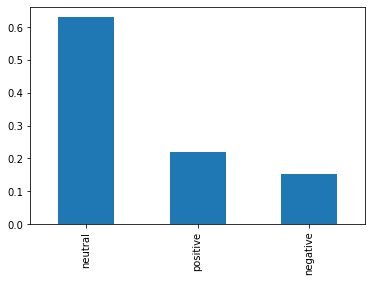

In [ ]:
# Get predicted sentiment
vax_tweets['sentiment'] = preds[0].argmax(dim=-1)
vax_tweets['sentiment'] = vax_tweets['sentiment'].map({0:'negative', 1:'neutral', 2:'positive'})

# Convert dates
vax_tweets['date'] = pd.to_datetime(vax_tweets['date'], errors='coerce').dt.date

# Save to csv
vax_tweets.to_csv('vax_tweets_sentiment.csv')

# Plot sentiment value counts
vax_tweets['sentiment'].value_counts(normalize=True).plot.bar();

In [ ]:
# Remove today's date since data is incomplete
today = pd.Timestamp.today().date()
vax_tweets = vax_tweets[vax_tweets['date']!=today]

# Get counts of number of tweets by sentiment for each date
timeline = vax_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results
import plotly.express as px
fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

In [ ]:
spike = vax_tweets[vax_tweets['date'].astype(str)=='2021-03-01']
spike['user_location'].value_counts(ascending=False).head(10)

India               258
New Delhi, India    138
patna                52
Mumbai, India        48
New Delhi            46
Bengaluru, India     32
Mumbai               28
Delhi                26
Hyderabad, India     24
Pune, India          22
Name: user_location, dtype: int64

In [ ]:
spike = spike.sort_values('user_location', ascending=False)
spike['orig_text'].head()

18084                        Before magreact, do the research how the vaccine works, regardless the brands and the efficacy rates. #TheVaccineIsSafe #Sinovac
17555          I find this Photo by @cpimspeak\nTo be offensive and degrading , \nIt is depicting something truly against the commun… https://t.co/X51R4sFQYq
15285                 🇮🇳 PM Shri @narendramodi took his first dose of the #COVID19 #Vaccine at AIIMS Delhi today.\nHe led the way in… https://t.co/tKLRgz3vml
16532          Got call at 9 am from health department and mom got #COVAXIN shot at 1 pm.\n\nThey do really care about their citizen… https://t.co/VdMUMXS9Nx
16901    #mRNAvaccine #PfizerBionTech\n#Moderna #Katalinkariko\n#NianshuangWang #Mclellan\n\nAs for J&amp;J, Astrazeneca, the effcti… https://t.co/tK1U6LFboZ
Name: orig_text, dtype: object

### Covaxin

In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['orig_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['orig_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

covaxin = filtered_timeline(vax_tweets, ['covaxin'], title='Covaxin')

In [ ]:
# Function to filter the data to a single date and print tweets from users with the most followers
def date_filter(df, date):
    return df[df['date'].astype(str)==date].sort_values('user_followers', ascending=False)[['date' ,'orig_text']]

def date_printer(df, dates, num=10): 
    for date in dates:
        display(date_filter(df, date).head(num))

date_printer(covaxin, ['2021-03-01', '2021-03-03'])

,date,orig_text
18936,2021-03-01,"""Felt secure, will travel safely"" EAM @DrSJaishankar receives his first shot of #Covaxin today \n\n#COVID19Vaccine… https://t.co/mkNsMDuJ5a"
17463,2021-03-01,#Watch | PM @NarendraModi was administered the first dose of Bharat Biotech’s #COVAXIN at AIIMS. \n\nThe vaccine was… https://t.co/Du3exryYQw
13382,2021-03-01,"@nistula Sources in the govt say PM #NarendraModi took the Indian researched and made #Covaxin by #BharatBiotech,ad… https://t.co/Z2nkbIfdRg"
13107,2021-03-01,"PM #NarendraModi took the first shot of #COVAXIN , the Indian researched and produced anti-COVID19 vaccine at AIIMS… https://t.co/0ORXTDXGSP"
18912,2021-03-01,There are two #CovidVaccines that are being used in India right now - Bharat Biotech's #Covaxin and Serum Institute… https://t.co/yqHUdBSebB
18960,2021-03-01,External Affairs Minister Jaishankar receives first dose of #Covaxin.\n#CovidVaccine #vaccination \n#LiveUpdates here… https://t.co/bTp57fZwML
18750,2021-03-01,"A 100-year-old resident of #Hyderabad, Jaidev Chowdhry, received his first dose of the Covid-19 vaccine, #Covaxin,… https://t.co/sQui1oMkFX"
18700,2021-03-01,"#PMModi took the first does of #Covid19 vaccine, #Covaxin, today. #NewsTrack #Video\nhttps://t.co/I2GTmtsGnt"
18666,2021-03-01,#PMModi took the first dose of #Covaxin today. Will this give the necessary boost to #vaccination drive in India? W… https://t.co/b26yz03azM
18803,2021-03-01,#PMModi flagged off the second phase of #Covid19 #vaccination today as he took his first dose of #Covaxin at #AIIMS… https://t.co/5F1OcGiJmn


,date,orig_text
20830,2021-03-03,"#Covaxin 81% Effective, Works Against UK Variant, Claims Bharat Biotech \n\nRead more: https://t.co/8XogSMns7c https://t.co/GmjX8APbYM"
20426,2021-03-03,"“The data is quite encouraging”: Dr Rachna Kucheria, Epidemiologist, on #Covaxin’s efficacy data https://t.co/hVT667gizB"
20441,2021-03-03,"“The numbers are extremely promising at this stage”: Dr Shekhar C Mande, Director General, CSIR, on #Covaxin's effi… https://t.co/rFoRhl1IEh"
20734,2021-03-03,"#Covaxin's Phase 3 Trial Results Out! #Covid19 Vaccine Efficacy Up At 81%, Says Bharat Biotech\n\nDetails:… https://t.co/FZGlK4PWYD"
20449,2021-03-03,"For those like me who were concerned that #Covaxin was being deployed before its third phase trials were concluded,… https://t.co/AryEWwcCV5"
20601,2021-03-03,"#Covaxin demonstrates the prowess of Atmanirbhar Bharat, says ICMR chief\n\n#COVID19Vaccine \n\nhttps://t.co/ITUyBPekvz https://t.co/kmbmUGf4X3"
20387,2021-03-03,India's vaccine maker Bharat Biotech said Wed its #covid19 #vaccine #Covaxin has demonstrated 81% interim efficacy… https://t.co/9egL9TJIV5
20418,2021-03-03,#Covaxin is one of the two vaccines that have been granted emergency use approval in India\n#CoronaVaccine… https://t.co/9lKj4Sn1Of
20888,2021-03-03,"Bharat Biotech announces phase 3 results of Covaxin, shows 81% efficacy. \n#5iveLive with @ShivAroor \n#Covaxin… https://t.co/D2yxrNb9Nf"
20709,2021-03-03,.@BharatBiotech announces the phase 3 results of its #CoronavirusVaccine #Covaxin; claims the shots demonstrated an… https://t.co/przGWrxAmN


### Sinovac

In [ ]:
sinovac = filtered_timeline(vax_tweets, ['sinovac'], title='Sinovac')

Some notable dates:

In [ ]:
date_printer(sinovac, ['2021-02-22', '2021-02-28', '2021-03-01', '2021-03-03', '2021-03-08'], 3)

,date,orig_text
11715,2021-02-22,Thai PM Prayut Chan-o-cha possibly among first to receive #Sinovac COVID-19 vaccine. #Thailand… https://t.co/sWKjP3no4i
11757,2021-02-22,"Carrie Lam, Chief Executive of #HongKong SAR, received her first jab of the #Sinovac COVID-19 vaccine https://t.co/CON1DIeVyo"
11765,2021-02-22,"The #Philippines has officially approved the emergency use of China's #Sinovac #COVID19 vaccine, the country's Food… https://t.co/TnyK1pphxE"


,date,orig_text
16270,2021-02-28,#Thai deputy PM and ministers are part of the first group to be vaccinated with the #Sinovac COVID-19 vaccine from… https://t.co/dV6gsk5KKk
16253,2021-02-28,"China has provided Mexico with 1 million doses of #Sinovac vaccines in two batches in a month, which serves as a st… https://t.co/2u60IJHnhs"
16254,2021-02-28,Second batch of #Sinovac vaccines produced by China arrived in Mexico on Saturday local time and was warmly receive… https://t.co/6oJau3Kcts


,date,orig_text
16806,2021-03-01,#Philippine General Hospital (PGH) Director Dr. Gerardo Legaspi received China's #Sinovac coronavirus vaccine on Mo… https://t.co/20g5Oj71or
16779,2021-03-01,The #Philippines kicked off vaccination drive with China’s #Sinovac #COVID19 vaccine on Monday. Philippine General… https://t.co/s6R6y1NmBp
16818,2021-03-01,"A batch of #Sinovac #vaccine donated by China arrived in the #Philippines on Sunday, the first COVID-19 vaccine to… https://t.co/3OqsI0yF8N"


,date,orig_text
19152,2021-03-03,Brazilian soccer legend #Pele on Tuesday received his first dose of a COVID-19 vaccine produced by China's #Sinovac… https://t.co/QMZu6bvRvt
19162,2021-03-03,"In pics: Raw materials for China's #Sinovac #COVID19 vaccine arrived in Bandung, #Indonesia, on Tuesday. https://t.co/Yp3KtjFWYW"
19175,2021-03-03,It is extremely unlikely that the death of a 63-year-old #HongKong man who received #Sinovac #COVID19 vaccine was l… https://t.co/ngsM3mlVlr


,date,orig_text
23487,2021-03-08,"The second batch of China's #Sinovac COVID-19 #vaccines arrived at the El Dorado International Airport in Bogota, C… https://t.co/wTZ247N93R"
24599,2021-03-08,"China's #Sinovac #covid19 #vaccines show an 80-90% efficacy rate within 2 months after two shots, but the number of… https://t.co/rft0soZa0K"
24601,2021-03-08,#Sinovac’s #vaccine shows an 80-90% efficacy rate within 2 months after two shots: CEO https://t.co/TwE4Q1C5Jd https://t.co/vXtecdECKl


These tweets are about countries starting their vaccination programme or receiving a new shipment of vaccines. Let's use the ['COVID-19 World Vaccination Progress'](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) dataset to plot daily vaccinations for the mentioned countries:

In [ ]:
vax_progress = pd.read_csv(path/'covid-world-vaccination-progress/country_vaccinations.csv', parse_dates=['date'])
vax_progress = vax_progress.replace([np.inf, -np.inf], np.nan)
vax_progress = vax_progress[vax_progress['date']!=today]
countries = ['Brazil', 'Thailand', 'Hong Kong', 'Colombia', 'Mexico', 'Philippines', 'Indonesia']
fig = px.line(vax_progress[vax_progress['country'].isin(countries)], x='date', y='daily_vaccinations_per_million', color='country',
             title='Daily vaccinations per million (all vaccines) in selected countries')
fig.show()

We can see that daily vaccinations per million increased significantly in Colombia and Mexico after they received new shipments of vaccines. Daily vaccinations are also increasing rapidly in Hong Kong after Carrie Lam received the vaccine on February 22nd; however, progress has been slower in Thailand and the Philippines so far.

### Sinopharm

In [ ]:
sinopharm = filtered_timeline(vax_tweets, ['sinopharm'], title='Sinopharm')

As with Sinovac, most of the Sinopharm tweets appear to be positive news regarding countries receiving a shipment of the vaccine:

In [ ]:
date_printer(sinopharm, ['2021-02-18', '2021-02-24', '2021-03-02'], 3)

,date,orig_text
9905,2021-02-18,"#Senegal received its #COVID19 vaccines purchased from China’s #Sinopharm on Wednesday, becoming the first country… https://t.co/FsXqvchhjn"
10391,2021-02-18,"Nepal has granted approval to China’s #Sinopharm #COVID19 vaccine for emergency use in Nepal, the country's drug re… https://t.co/wCdXKn1wAF"
10380,2021-02-18,"With the #Sinopharm #vaccine, Hungarians will have access to five vaccines against COVID-19. #Hungary has also beco… https://t.co/QAtqUVe8MN"


,date,orig_text
12655,2021-02-24,"#Sinopharm's second COVID-19 vaccine has a 72.51% protection rate against the virus, an official statement said.… https://t.co/TM2VjqB6Dh"
13958,2021-02-24,The first batch of China's #Sinopharm vaccine arrived at Bolivia's Santa Cru on Wednesday morning.\n\nOfficials inclu… https://t.co/8NjQnSncEO
12680,2021-02-24,"#Senegal on Tuesday officially began the first phase of #COVID19 vaccination with China's #Sinopharm vaccines, taki… https://t.co/k6Erj8P9iZ"


,date,orig_text
17972,2021-03-02,"The first batch of #Sinopharm #COVID19 vaccine donated by China arrived in Baghdad, the capital of Iraq on Tuesday. https://t.co/V2JhwxO8lN"
17977,2021-03-02,"China will provide 50,000 inactivated #Sinopharm #COVID19 vaccine doses to #Lebanon to assist them deal with the pa… https://t.co/yU2BlMhCVZ"
17945,2021-03-02,"#Iraq received its first 50,000 doses of the #Sinopharm #COVID19 vaccine donated by China as the country is struggl… https://t.co/TJ5gVqX7iP"


In [ ]:
countries = ['Senegal', 'Nepal', 'Hungary', 'Bolivia', 'Lebanon']
fig = px.line(vax_progress[vax_progress['country'].isin(countries)], x='date', y='daily_vaccinations_per_million', color='country',
             title='Daily vaccinations per million (all vaccines) in selected countries')
fig.show()

We can see that Hungary ramped up their vaccination programme after the news on February 18th that they would [become the first EU country to start administering Sinopharm](https://www.gbcghanaonline.com/world/hungary-becomes-first-eu-country-to-administer-sinopharm-vaccine/2021/). In addition, Senegal started vaccinating shortly after positive tweets confirmed that they had received a shipment of Sinopharm vaccines. Unfortunately there is no data for Iraq, but they also [started their programme just hours after receiving a donation of vaccines](https://medicalxpress.com/news/2021-03-iraq-vaccine-china-doses.html) from China.

### Moderna

In [ ]:
moderna = filtered_timeline(vax_tweets, ['moderna'], title='Moderna')

Some notable dates:

In [ ]:
date_printer(moderna, ['2021-02-17', '2021-03-05', '2021-03-11'], 3)

,date,orig_text
9458,2021-02-17,"#UPDATE The European Union has bought up to 300 million extra Covid-19 vaccine doses from US firm #Moderna, Europea… https://t.co/WDNNmFnfdv"
9464,2021-02-17,#Covid19: EU approves contract for 300 million more #Moderna vaccine doses https://t.co/l2uDsU7LeM
9471,2021-02-17,💉🇪🇺 The European Commission said on Wednesday it had struck a deal for an extra 150 million doses of #Moderna's… https://t.co/nTc0nZzEOt


,date,orig_text
22451,2021-03-05,"#Japan’s Takeda Pharmaceutical Co asks regulators to approve use of the #COVID19 #vaccine of #Moderna Inc, which wo… https://t.co/tjhGYK47iu"
22460,2021-03-05,#Moderna To Collaborate With IBM On #COVID19Vaccine Distribution — Utilizing #Blockchain Tech ⁦@IrmaRaste⁩ ⁦… https://t.co/Kgsg8xEnFX
21229,2021-03-05,Moderna COVID-19 Vaccine Recipients Experience Delayed Skin Rash After First Dose: Report #Moderna #COVID19Vaccine… https://t.co/z8bzqRlH8o


,date,orig_text
25772,2021-03-11,@mpetrillo59 It was the #Moderna.
25776,2021-03-11,I got the #CovidVaccine today.\nI received the #Moderna. 2nd shot is scheduled in April.\n#ncpol #nc13 https://t.co/mLqfKRl6rz
25938,2021-03-11,"🇺🇸Utah mother, 39, with NO known health issues dies four days after receiving second dose of #Moderna's COVID 💉💉💉💉\n\nhttps://t.co/FkA9RbAeiV"


On March 2nd Dolly Parton received her dose of the vaccine she helped fund, which explains the initial increase in positive tweets prior to the news about Moderna's collaboration with IBM. By looking at the vaccine progress, we can see that the median daily vaccinations per million in EU countries started to pull further ahead of the rest of the world after news that they would purchase up to 300m extra Moderna vaccines:

In [ ]:
countries = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 
             'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
             'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
             'Romania', 'Slovakia', 'Slovenia', 'Spain','Sweden']
eu = vax_progress[vax_progress['country'].isin(countries)].groupby('date')['daily_vaccinations_per_million'].median().reset_index()
eu['region'] = 'EU'
row = vax_progress[~vax_progress['country'].isin(countries)].groupby('date')['daily_vaccinations_per_million'].median().reset_index()
row['region'] = 'Rest of world'
fig = px.line(eu.append(row), x='date', y='daily_vaccinations_per_million', color='region',
             title='Median daily vaccinations per million (all vaccines) in EU countries vs the rest of the world')

fig.add_annotation(x='2021-02-17', y=2120,
            text="EU makes a deal to purchase up to 300m extra Moderna vaccines",
            showarrow=True,
            arrowhead=5, ax=-220, ay=-30)

fig.add_vline(x='2021-02-17', line_width=3, line_dash="dash", line_color="limegreen")

fig.show()

### Sputnik V

In [ ]:
sputnikv = filtered_timeline(vax_tweets, ['sputnik'], title='Sputnik V')

Some notable dates:

In [ ]:
date_printer(sputnikv, ['2021-03-04', '2021-03-05', '2021-03-10', '2021-03-11', '2021-03-15'], 3)

,date,orig_text
21970,2021-03-04,"European Union drug regulator on Thursday started reviewing Russia's #SputnikV COVID-19 vaccine. If passed, it will… https://t.co/jOi09Lgkaz"
22050,2021-03-04,Sputnik V could be India's third #Covid19 vaccine: Experts\n\nMore vaccine options may be needed to cater to the worl… https://t.co/AaSJuLANWO
22029,2021-03-04,Sputnik V Could Be India’s 3rd COVID Vaccine: Experts \n\n#COVID19 #COVIDVaccine #SputnikV \nhttps://t.co/3Tao75XnVV


,date,orig_text
22889,2021-03-05,[Coronavirus] EU's medicines agency @EMA_News has started a rolling review of Russia's #SputnikV vaccine - an annou… https://t.co/bFs92o8iNH
22904,2021-03-05,#SputnikV is now the world's second most popular #CovidVaccine in terms of regulatory approvals. Thank you for this… https://t.co/z0vOW8Ynh2
22915,2021-03-05,Twitter officially Verified #SputnikV account. Together we are stronger! ✔️ is for Victory! ✌️ https://t.co/CrjOSTMrjJ


,date,orig_text
29121,2021-03-10,Iran and Russia will start to jointly produce the Russian #SputnikV #covid19 #vaccine in Iran before March 20; the… https://t.co/mmjG0qFkMs
29255,2021-03-10,"#Russia has signed a deal to produce its #SputnikV coronavirus vaccine in #Italy, the first contract in the Europea… https://t.co/HbCxI15Gbz"
29258,2021-03-10,"#SputnikV has not yet been approved for use in the #EuropeanUnion, but the body's regulator, the European Medicines… https://t.co/l8kvZHkAZm"


,date,orig_text
29023,2021-03-11,Best #SputnikV4Victory photos will be published across #SputnikV and @tass_agency social media and web platforms. L… https://t.co/F9wPnuDS2J
29024,2021-03-11,"#SputnikV, approved by 50 countries, brings victory over #COVID19 closer. Together with @tass_agency, we ask our f… https://t.co/ukqjzxMwmZ"
29005,2021-03-11,"Anti-#covid19 update:\n\n🇰🇪Kenya, 🇲🇦Morocco, 🇯🇴Jordan and 🇳🇦Namibia authorise use of 🇷🇺#SputnikV;\n🇦🇪UAE trials show… https://t.co/sZJCrOeJji"


,date,orig_text
28665,2021-03-15,#NewsAlert | #SputnikV production agreements reached in key EU countries: AFP quoting official\n\nTrack real-time upd… https://t.co/syPRIAN0SQ
28600,2021-03-15,The developers of the #SputnikV #coronavirus #vaccine say they have reached production agreements in key European c… https://t.co/mnSx7ufiuO
28556,2021-03-15,"@Malinka1102 Salam, here is your unroll: #Russia, #US,and the fight over #SputnikV Short THREAD #Putin made…… https://t.co/HJd5GfsHsh"


We can see spikes in positive sentiment after various countries agreed to produce the Sputkik V vaccine, and on March 11th after ABC news reported that it was the safest vaccine.

### Pfizer/BioNTech

In [ ]:
pfizer = filtered_timeline(vax_tweets, ['pfizer', 'biontech'], title='Pfizer/BioNTech')

There is a lot to unpack here, so to make things easier let's annotate some of the key dates:

In [ ]:
timeline = pfizer.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()

fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},
              title='Timeline showing sentiment of tweets about the PfizerBioNTech vaccine')

fig.add_annotation(x='2020-12-14', y=timeline[(timeline['date']==pd.Timestamp('2020-12-14'))&(timeline['sentiment']=='positive')]['tweets'].values[0],
            text="USA and UK start vaccinating",
            showarrow=True,
            arrowhead=3, ax=11, ay=-220)

fig.add_annotation(x='2020-12-22', y=timeline[(timeline['date']==pd.Timestamp('2020-12-22'))&(timeline['sentiment']=='positive')]['tweets'].values[0],
            text="Joe Biden receives first dose",
            arrowhead=3, ax=80, ay=-60)

fig.add_annotation(x='2021-01-08', y=timeline[(timeline['date']==pd.Timestamp('2021-01-08'))&(timeline['sentiment']=='positive')]['tweets'].values[0],
            text="Vaccine shown to resist new variant",
            showarrow=True, align='left',
            arrowhead=3, ax=-70, ay=-25)

fig.add_annotation(x='2021-01-16', y=timeline[(timeline['date']==pd.Timestamp('2021-01-16'))&(timeline['sentiment']=='negative')]['tweets'].values[0],
            text="23 elderly Norwegians die after vaccine dose",
            showarrow=True, align='left',
            arrowhead=3, ax=15, ay=-175)

fig.add_annotation(x='2021-02-19', y=timeline[(timeline['date']==pd.Timestamp('2021-02-19'))&(timeline['sentiment']=='positive')]['tweets'].values[0],
            text="Israeli study shows 85% efficacy after one dose",
            showarrow=True, align='left',
            arrowhead=3, ax=-170, ay=-50)

fig.add_annotation(x='2021-02-25', y=timeline[(timeline['date']==pd.Timestamp('2021-02-25'))&(timeline['sentiment']=='positive')]['tweets'].values[0],
            text="Peer review of Israeli study shows 94% efficacy after two doses",
            showarrow=True, align='left',
            arrowhead=3, ax=0, ay=-90)

fig.show()

### Oxford/AstraZeneca

In [ ]:
oxford = filtered_timeline(vax_tweets, ['oxford', 'astrazeneca'], title='Oxford/AstraZeneca')

Interestingly, there are small positive spikes on February 19th and March 6th, with people tweeting after receiving the vaccine:

In [ ]:
date_printer(oxford, ['2021-02-19', '2021-03-06'], 5)

,date,orig_text
10616,2021-02-19,Had my 1st dose of the vaccine. Very impressed with the experience #thankyouNHS #oxfordastrazeneca https://t.co/s01VAZJQym
11107,2021-02-19,@nicolab03 Hurrah! Had mine today too. #OxfordAstrazeneca
11108,2021-02-19,Blimey I feel crap. \n\nBut it’s totally worth it. \n\n#vaccinated #oxfordastrazeneca #asthmatic #50yearold https://t.co/9SDgpksuz0
10617,2021-02-19,#vaccine study #nurses #volunteers\n#oxfordastrazeneca #oxfordvaccine\n\nhttps://t.co/Xd3wgMWoDS
11096,2021-02-19,Our latest paper on doses of the #oxfordastrazeneca vaccine is now out https://t.co/vle52xsNwp


,date,orig_text
23252,2021-03-06,“The #OxfordAstraZeneca #CovidVaccine developed by Oxford University and AstraZeneca given by intramuscular inject… https://t.co/zMKYLemXng
23255,2021-03-06,Drive through #Whitstable for #NewHusband #OxfordAstraZeneca vaccine https://t.co/hoqcAi05zU
22518,2021-03-06,@BWildeMTL Hope it gets sorted soon Brian. I had my first jab today. #OxfordAstraZeneca UK now over 22m 1st jabs an… https://t.co/Quu4dOEOgU
23250,2021-03-06,"Update... If you look closely, you'll see where the needle went in #OxfordAstraZeneca #CovidVaccine… https://t.co/F0IDofOE6s"
22488,2021-03-06,EU seeks to access AstraZeneca vaccines produced in US https://t.co/ZpdpsIb4bN #Europe #EU #EuropeanUnion #Brussels… https://t.co/3CLr6J3xKY


However, negative sentiment is increasing after [numerous countries have suspended the use of the vaccine over safety concerns](https://www.cornwalllive.com/news/cornwall-news/every-country-stopped-using-astrazeneca-5189849). We can see that vaccination progress has slowed significantly over the past few days as a result:

In [ ]:
# At the time of writing, these countries have completely suspended the use of the vaccine
# Note that several other countries continued mostly as normal but suspended the use of one batch of Oxford/AstraZeneca vaccines
countries = ['Germany', 'France', 'Spain', 'Italy', 'Netherlands', 'Ireland', 'Denmark', 'Norway', 'Bulgaria', 'Iceland', 'Thailand']
ox_prog = vax_progress[vax_progress['country'].isin(countries)].groupby('date')['daily_vaccinations_per_million'].median().reset_index()
ox_prog['Use of Oxford/AstraZeneca'] = 'Suspended'
other_prog = vax_progress[vax_progress['vaccines'].str.contains('Oxford/AstraZeneca')]
other_prog = vax_progress[~vax_progress['country'].isin(countries)].groupby('date')['daily_vaccinations_per_million'].median().reset_index()
other_prog['Use of Oxford/AstraZeneca'] = 'Ongoing'
fig = px.line(ox_prog.append(other_prog), x='date', y='daily_vaccinations_per_million', color='Use of Oxford/AstraZeneca',
             title="Median daily vaccinations per million (all vaccines) in countries that have completely suspended the use of the\
              <br>Oxford/AstraZeneca vaccine vs countries that continue to use it")
fig.add_vrect(x0="2021-03-11", x1="2021-03-14", 
              annotation_text="vaccine<br>suspended", annotation_position="bottom right",
              fillcolor="limegreen", opacity=0.25, line_width=0)
fig.show()

The overall sentiment of the Oxford/AstraZeneca vaccine is therefore significantly more negative than average:

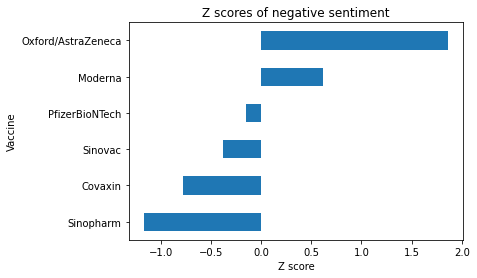

In [ ]:
# Get z scores of sentiment for each vaccine
vax_names = {'Covaxin': covaxin, 'Sinovac': sinovac, 'Sinopharm': sinopharm,
            'Moderna': moderna, 'Oxford/AstraZeneca': oxford, 'PfizerBioNTech': pfizer}
sentiment_zscores = pd.DataFrame()
for k, v in vax_names.items():
    senti = v['sentiment'].value_counts(normalize=True)
    senti['vaccine'] = k
    sentiment_zscores = sentiment_zscores.append(senti)
for col in ['negative', 'neutral', 'positive']:
    sentiment_zscores[col+'_zscore'] = (sentiment_zscores[col] - sentiment_zscores[col].mean())/sentiment_zscores[col].std(ddof=0)
sentiment_zscores.set_index('vaccine', inplace=True)

# Plot the results
ax = sentiment_zscores.sort_values('negative_zscore')['negative_zscore'].plot.barh(title='Z scores of negative sentiment')
ax.set_ylabel('Vaccine')
ax.set_xlabel('Z score');

### Further analysis using 'smarter' word clouds
The final thing we will do is to generate word clouds to see which words are indicative of each sentiment. The code below is from [this notebook](https://www.kaggle.com/pawanbhandarkar/generate-smarter-word-clouds-with-log-likelihood), which contains a more detailed explanation of the methodology used to generate 'smarter' word clouds. Please go and upvote the original notebook if you find this part useful!

In [ ]:
!pip install wordninja
!pip install pyspellchecker

     |████████████████████████████████| 541 kB 2.9 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541553 sha256=f2f18a2bb8e98b3d001f57d4f7c873198c2acbfe62d3b56c223ba4494ee8a847
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja
     |████████████████████████████████| 2.7 MB 2.8 MB/s 


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import wordninja
from spellchecker import SpellChecker
from collections import Counter
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))  
stop_words.add("amp")

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# FUNCTIONS REQUIRED

def flatten_list(l):
    return [x for y in l for x in y]

def is_acceptable(word: str):
    return word not in stop_words and len(word) > 2

# Color coding our wordclouds 
def red_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def green_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

# Reusable function to generate word clouds 
def generate_word_clouds(neg_doc, neu_doc, pos_doc):
    # Display the generated image:
    fig, axes = plt.subplots(1,3, figsize=(20,10))
    
    wordcloud_neg = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neg_doc))
    axes[0].imshow(wordcloud_neg.recolor(color_func=red_color_func, random_state=3), interpolation='bilinear')
    axes[0].set_title("Negative Words")
    axes[0].axis("off")

    wordcloud_neu = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(neu_doc))
    axes[1].imshow(wordcloud_neu.recolor(color_func=yellow_color_func, random_state=3), interpolation='bilinear')
    axes[1].set_title("Neutral Words")
    axes[1].axis("off")

    wordcloud_pos = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(pos_doc))
    axes[2].imshow(wordcloud_pos.recolor(color_func=green_color_func, random_state=3), interpolation='bilinear')
    axes[2].set_title("Positive Words")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

def get_top_percent_words(doc, percent):
    # Returns a list of "top-n" most frequent words in a list 
    top_n = int(percent * len(set(doc)))
    counter = Counter(doc).most_common(top_n)
    top_n_words = [x[0] for x in counter]
    
    return top_n_words
    
def clean_document(doc):
    spell = SpellChecker()
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize words (needed for calculating frequencies correctly )
    doc = [lemmatizer.lemmatize(x) for x in doc]
    
    # Get the top 10% of all words. This may include "misspelled" words 
    top_n_words = get_top_percent_words(doc, 0.1)

    # Get a list of misspelled words 
    misspelled = spell.unknown(doc)
    
    # Accept the correctly spelled words and top_n words 
    clean_words = [x for x in doc if x not in misspelled or x in top_n_words]
    
    # Try to split the misspelled words to generate good words (ex. "lifeisstrange" -> ["life", "is", "strange"])
    words_to_split = [x for x in doc if x in misspelled and x not in top_n_words]
    split_words = flatten_list([wordninja.split(x) for x in words_to_split])
    
    # Some splits may be nonsensical, so reject them ("llouis" -> ['ll', 'ou', "is"])
    clean_words.extend(spell.known(split_words))
    
    return clean_words

def get_log_likelihood(doc1, doc2):    
    doc1_counts = Counter(doc1)
    doc1_freq = {
        x: doc1_counts[x]/len(doc1)
        for x in doc1_counts
    }
    
    doc2_counts = Counter(doc2)
    doc2_freq = {
        x: doc2_counts[x]/len(doc2)
        for x in doc2_counts
    }
    
    doc_ratios = {
        # 1 is added to prevent division by 0
        x: math.log((doc1_freq[x] +1 )/(doc2_freq[x]+1))
        for x in doc1_freq if x in doc2_freq
    }
    
    top_ratios = Counter(doc_ratios).most_common()
    top_percent = int(0.1 * len(top_ratios))
    return top_ratios[:top_percent]

# Function to generate a document based on likelihood values for words 
def get_scaled_list(log_list):
    counts = [int(x[1]*100000) for x in log_list]
    words = [x[0] for x in log_list]
    cloud = []
    for i, word in enumerate(words):
        cloud.extend([word]*counts[i])
    # Shuffle to make it more "real"
    random.shuffle(cloud)
    return cloud

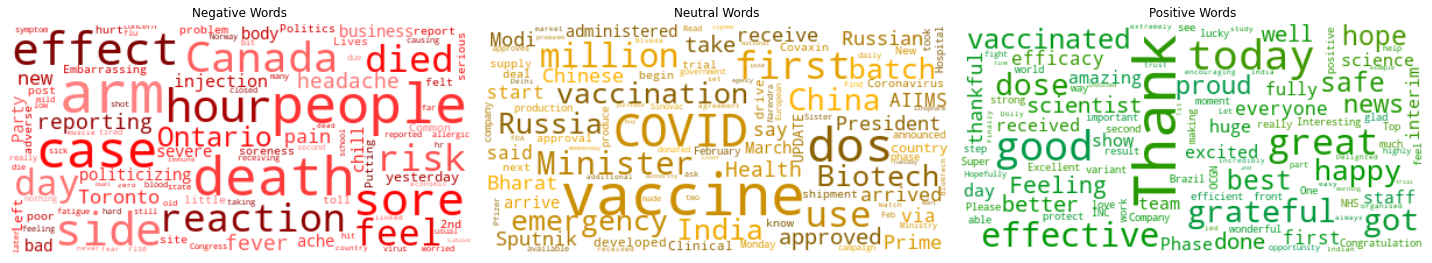

In [ ]:
# Convert string to a list of words
vax_tweets['words'] = vax_tweets.text.apply(lambda x:re.findall(r'\w+', x ))

def get_smart_clouds(df):

    neg_doc = flatten_list(df[df['sentiment']=='negative']['words'])
    neg_doc = [x for x in neg_doc if is_acceptable(x)]

    pos_doc = flatten_list(df[df['sentiment']=='positive']['words'])
    pos_doc = [x for x in pos_doc if is_acceptable(x)]

    neu_doc = flatten_list(df[df['sentiment']=='neutral']['words'])
    neu_doc = [x for x in neu_doc if is_acceptable(x)]

    # Clean all the documents
    neg_doc_clean = clean_document(neg_doc)
    neu_doc_clean = clean_document(neu_doc)
    pos_doc_clean = clean_document(pos_doc)

    # Combine classes B and C to compare against A (ex. "positive" vs "non-positive")
    top_neg_words = get_log_likelihood(neg_doc_clean, flatten_list([pos_doc_clean, neu_doc_clean]))
    top_neu_words = get_log_likelihood(neu_doc_clean, flatten_list([pos_doc_clean, neg_doc_clean]))
    top_pos_words = get_log_likelihood(pos_doc_clean, flatten_list([neu_doc_clean, neg_doc_clean]))

    # Generate syntetic a corpus using our loglikelihood values 
    neg_doc_final = get_scaled_list(top_neg_words)
    neu_doc_final = get_scaled_list(top_neu_words)
    pos_doc_final = get_scaled_list(top_pos_words)

    # Visualise our synthetic corpus
    generate_word_clouds(neg_doc_final, neu_doc_final, pos_doc_final)
    
get_smart_clouds(vax_tweets)

This looks pretty good! The positive tweets appear to be from people who have just received their first vaccine or are grateful for the job scientists and healthcare workers are doing, whereas the negative tweets seem to be from people who have suffered adverse reactions to the vaccine. The neutral tweets seem to be more like news, which could explain why it is the most prevelant sentiment; in fact, the vast majority of tweets contain urls:

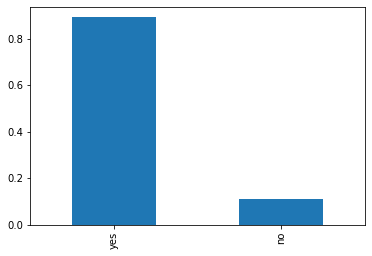

In [ ]:
vax_tweets['has_url'] = np.where(vax_tweets['orig_text'].str.contains('http'), 'yes', 'no')
vax_tweets['has_url'].value_counts(normalize=True).plot.bar();

Interestingly, Canada shows up in the negative word cloud, as well as a couple of Canadian cities. Looking at a 'naive' word cloud for tweets containing 'Canada' shows us that this appears to be a political/economic issue:

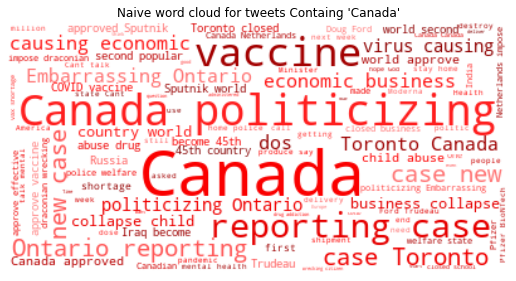

In [ ]:
def get_cloud(df, string, c_func):
    string_l = string.lower()
    df[string_l] = np.where(df['text'].str.lower().str.contains(string_l), 1, 0)
    cloud_df = df.copy()[df[string_l]==1]
    doc = flatten_list(cloud_df['words'])
    doc = [x for x in doc if is_acceptable(x)]
    doc = clean_document(doc)
    fig, axes = plt.subplots(figsize=(9,5))
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(doc))
    axes.imshow(wordcloud.recolor(color_func=c_func, random_state=3), interpolation='bilinear')
    axes.set_title("Naive word cloud for tweets Containg '%s'" % (string))
    axes.axis("off")
    plt.show();
    
get_cloud(vax_tweets, 'Canada', red_color_func)

At the time of writing Canada's vaccination progress has been slower than other developed nations, and people are predicting that it [might have an impact on Canada's economic recovery](https://www.theguardian.pe.ca/news/canada/slow-vaccine-rollout-in-canada-expected-to-be-a-drag-on-economic-recovery-558857/):

In [ ]:
countries = ['Canada', 'United Kingdom', 'United States', 'Chile', 'Singapore', 'Israel', 'Australia']
selected = vax_progress[vax_progress['country'].isin(countries)]
eu['country'] = 'EU median'
fig = px.line(vax_progress[vax_progress['country'].isin(countries)].append(eu), x='date', y='daily_vaccinations_per_million', color='country',
             title='Daily vaccinations per million (all vaccines) in Canada vs selected other developed nations')
fig.show()

## Conclusion
`fastai` make NLP really easy and we were able to get quite good results with a limited dataset and not a lot of training time by using the ULMFiT approach. To summarise, the steps are:
1. Fine-tune a language model to predict the next word in a tweet, using a model pre-trained on Wikipedia.
2. Fine-tune a classification model to predict tweet sentiment using the pre-trained language model.
3. Apply the classifier to unlabelled tweets to analyse sentiment.

We were also able to use the model to gain a lot of insights about how sentiment has changed over time for each vaccine and how that relates to the overall progress of vaccination programmes in different countries. I hope you found this useful, and thanks very much to [Gabriel Preda](https://www.kaggle.com/gpreda) for providing the data!